Clustering Analysis 

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :
Data Preprocessing:
	•	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
	•	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
	•	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
	•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
	•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
	•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
	•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
file_path = 'EastWestAirlines.xlsx'
data = pd.read_excel(file_path, sheet_name='data')

# Display the first few rows of the dataset
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
# Remove outliers using z-score method (example)
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Convert the scaled data back to a DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, columns=data.select_dtypes(include=[np.number]).columns)

# Display the first few rows of the scaled dataset
scaled_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.766325,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-1.765460,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-1.764596,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-1.763731,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,-1.762866,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577


/Users/vaishanavipurohit/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


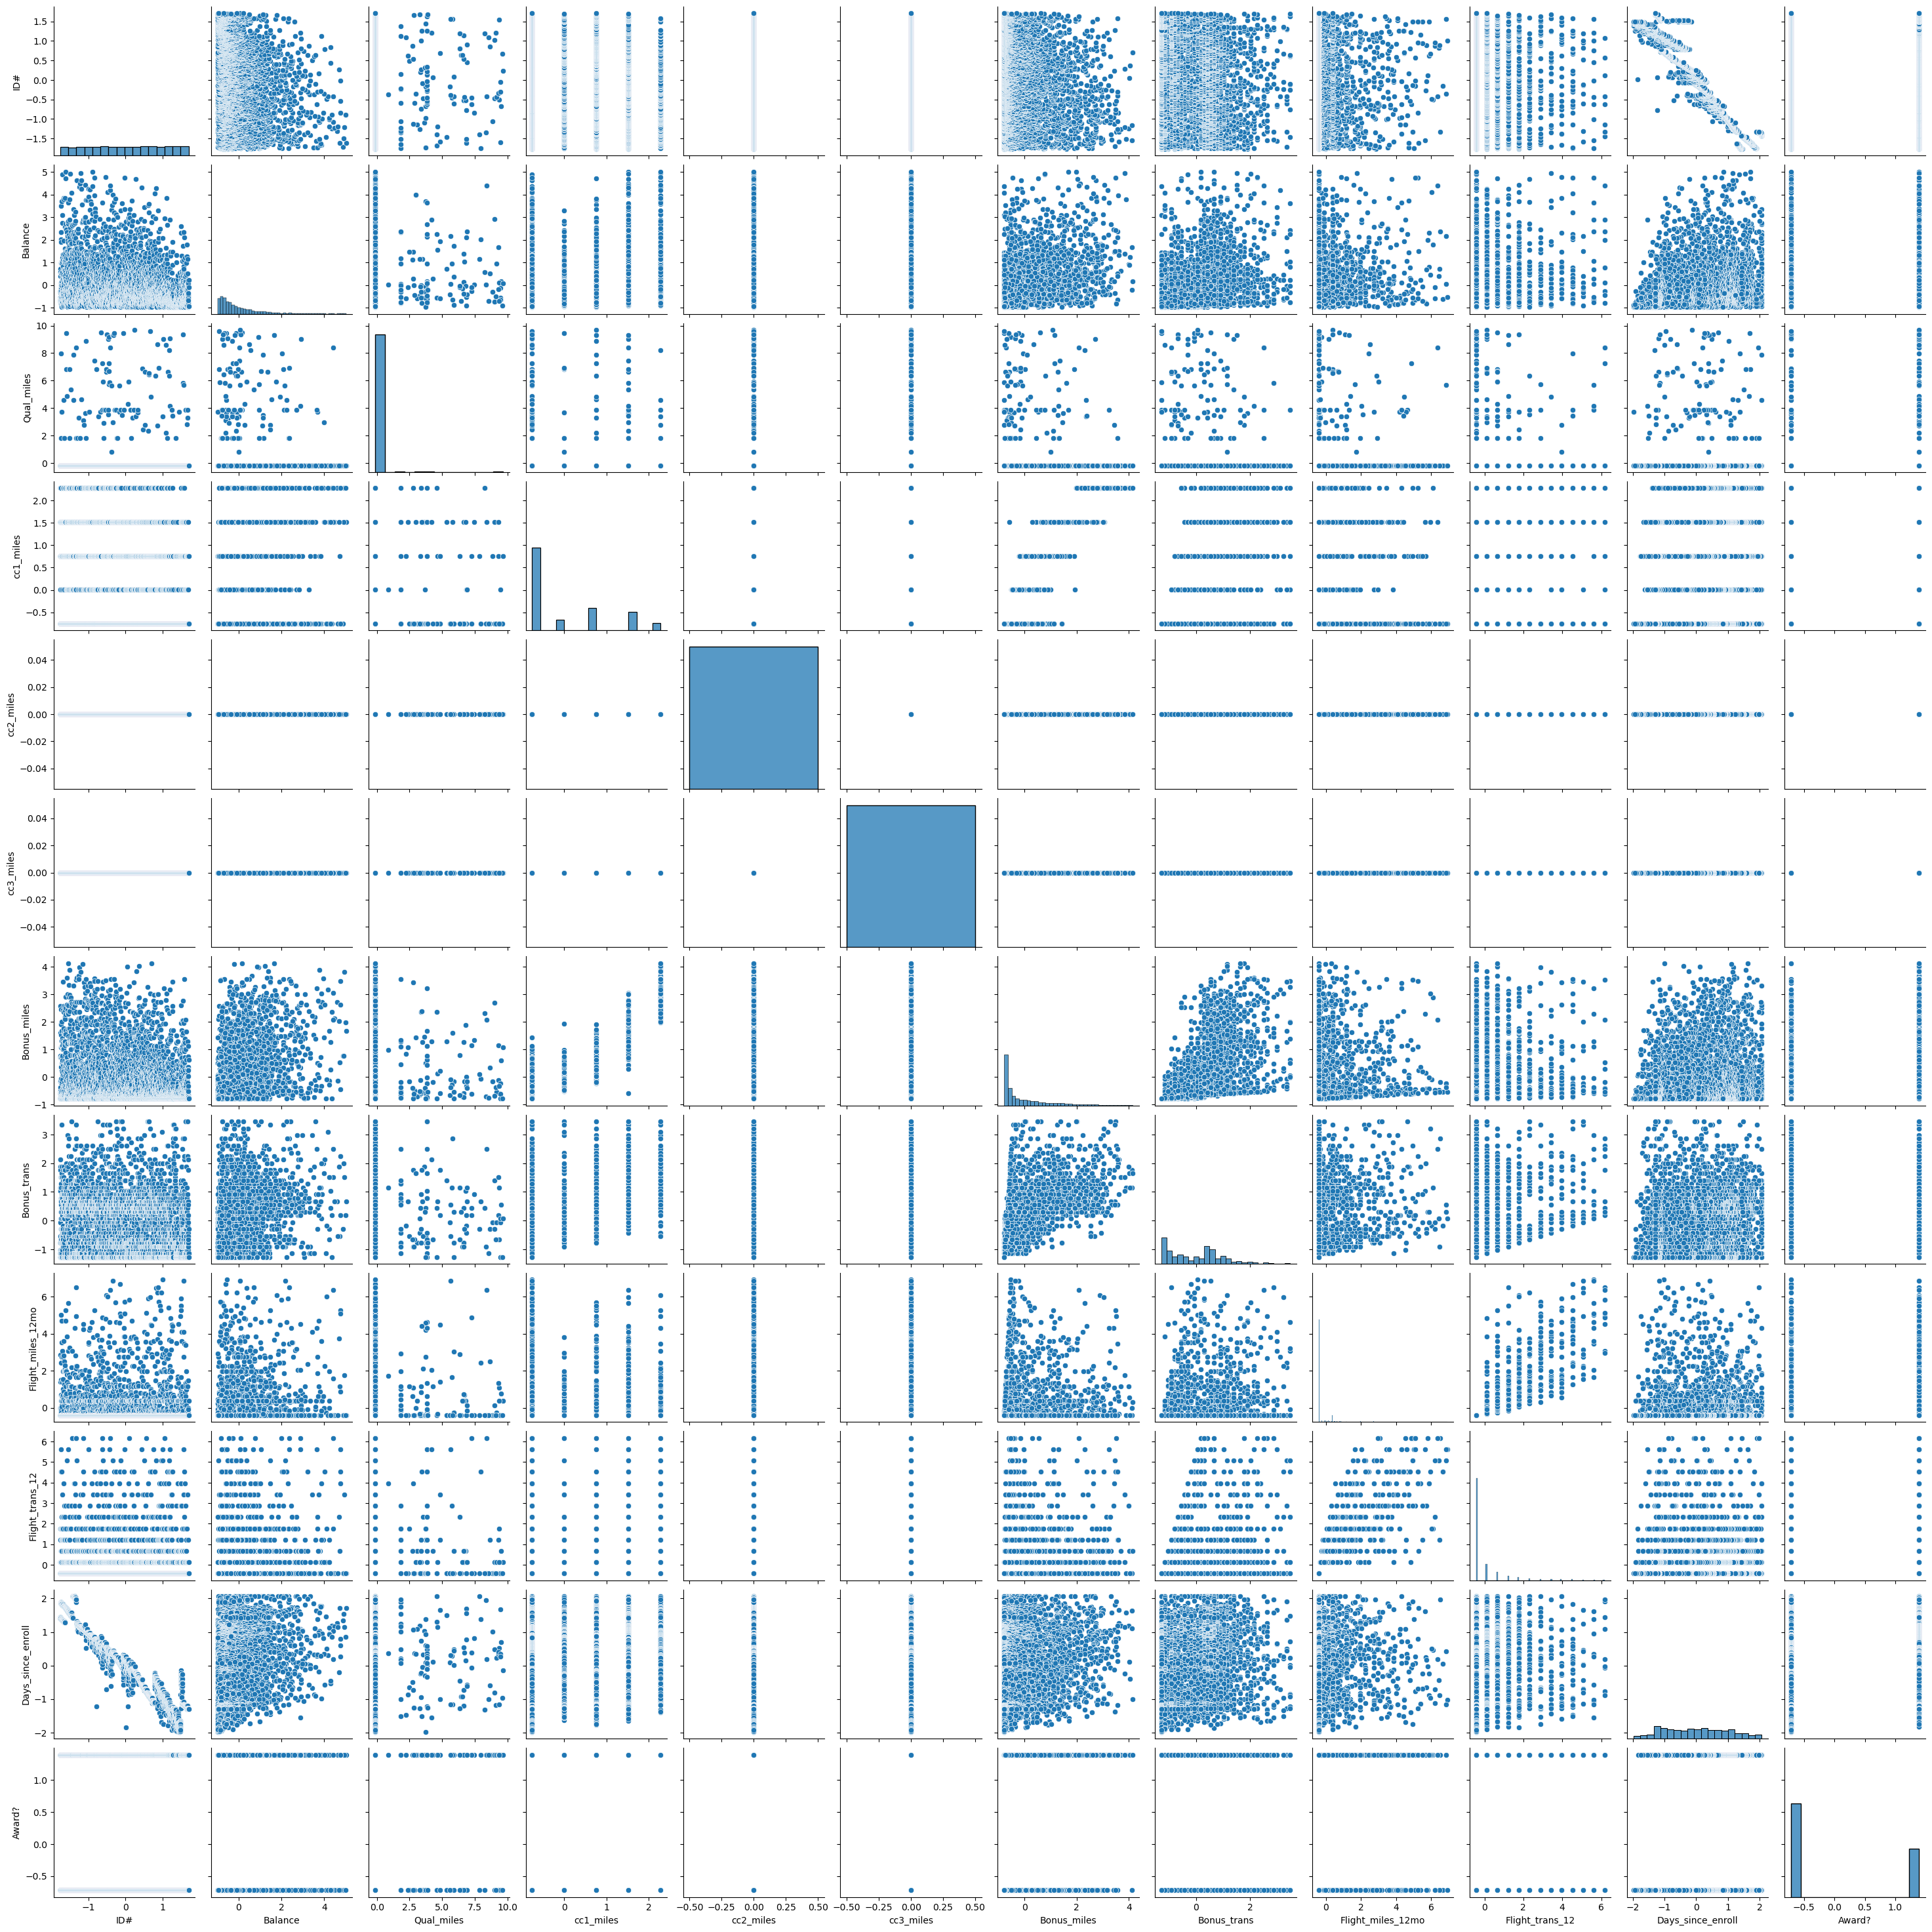

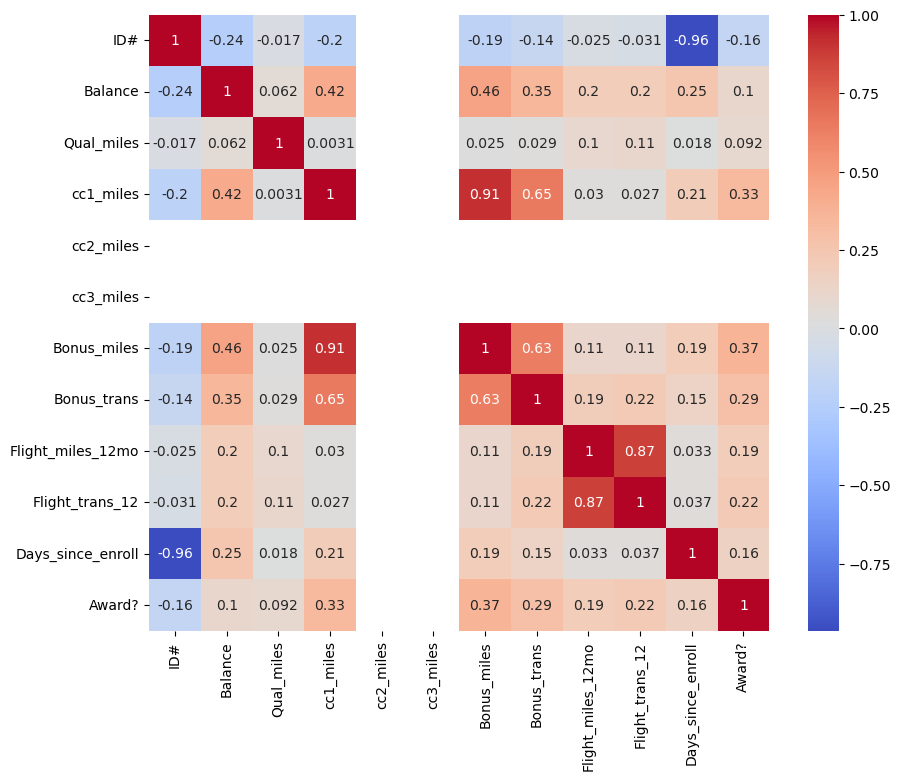

In [8]:
# Pair plot to visualize the relationships between features
sns.pairplot(scaled_df)
plt.show()

# Correlation heatmap to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.show()

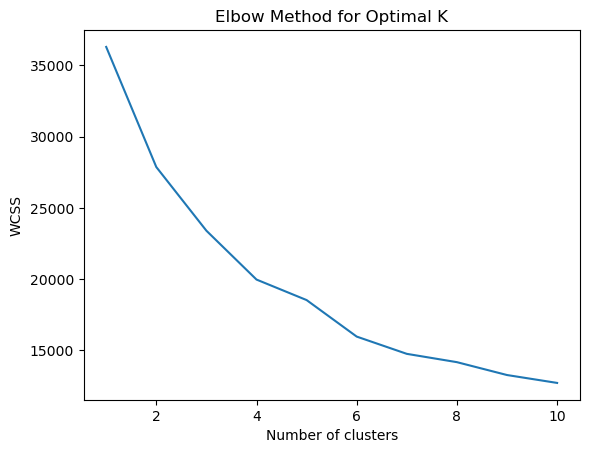

Silhouette Score for K-Means: 0.29192710837860614


/var/folders/5k/r3l31pv16w7dpzj4651hl7zw0000gn/T/ipykernel_2019/230369840.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KMeans_Cluster'] = kmeans_labels


In [9]:


# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans_labels

# Calculate silhouette score for K-Means
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')


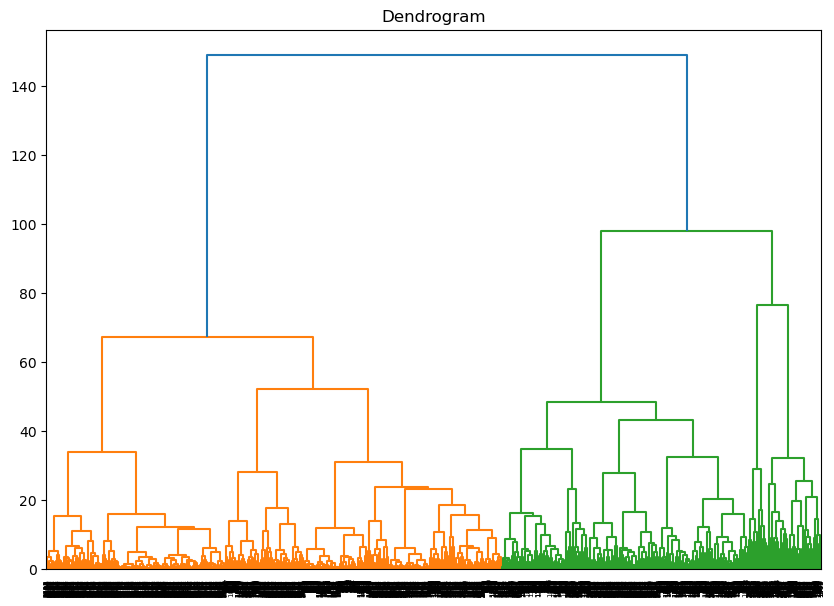

Silhouette Score for Hierarchical Clustering: 0.3568147420892313


In [16]:

# Plot the dendrogram to determine the optimal number of clusters
linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(scaled_df)

# Add the cluster labels to the original dataset
data['HC_Cluster'] = hc_labels

# Calculate silhouette score for Hierarchical Clustering
hc_silhouette = silhouette_score(scaled_df, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {hc_silhouette}')

In [17]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add the cluster labels to the original dataset
data['DBSCAN_Cluster'] = dbscan_labels

# Calculate silhouette score for DBSCAN
# Note: Silhouette score is only meaningful for clusters with more than one sample
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')
else:
    print('DBSCAN did not form any clusters.')


Silhouette Score for DBSCAN: -0.39477432202245644


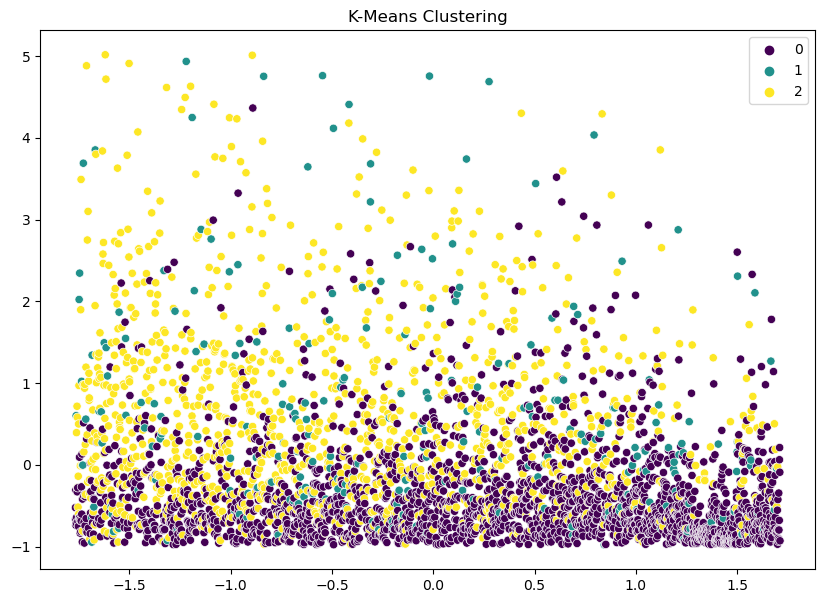

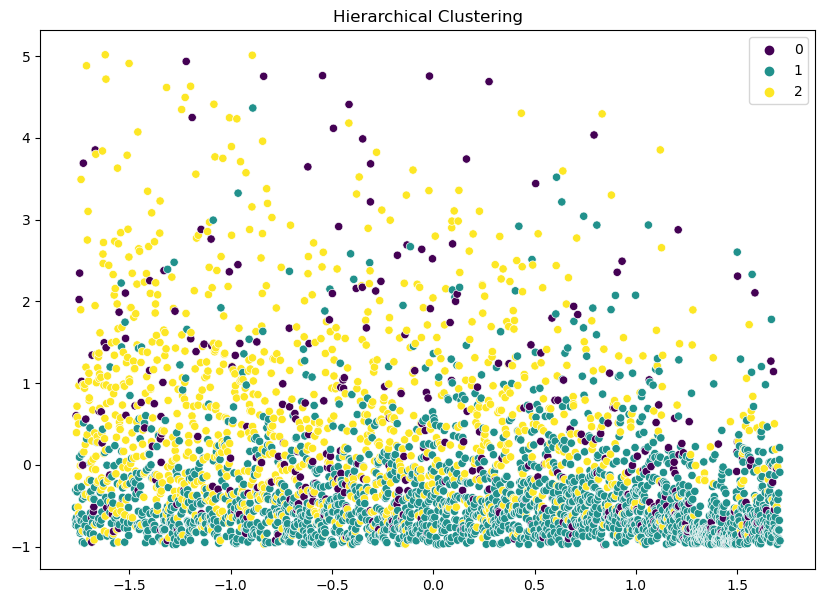

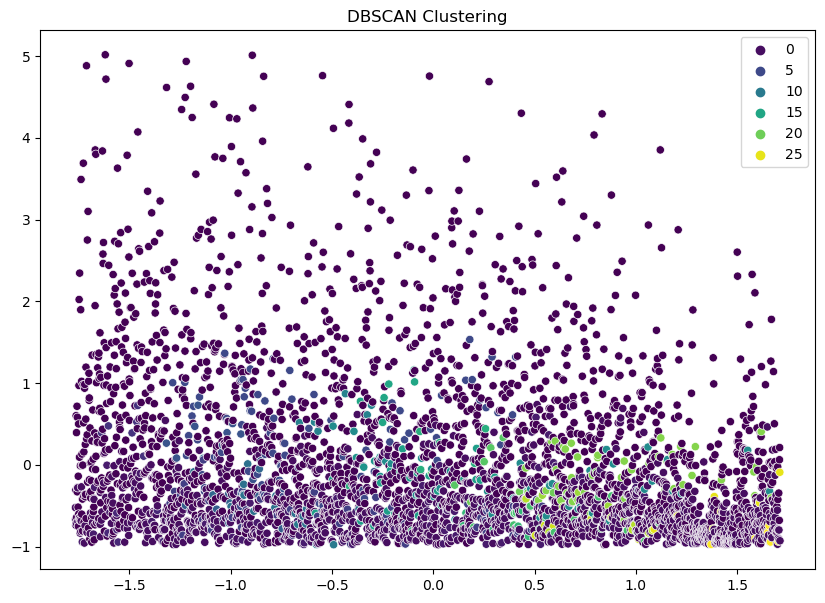

In [20]:
# K-Means Clustering Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clustering Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=hc_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Clustering Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [21]:
# Analyze and interpret the clusters generated by each algorithm
# For K-Means
print(data.groupby('KMeans_Cluster').mean())

# For Hierarchical Clustering
print(data.groupby('HC_Cluster').mean())

# For DBSCAN
print(data.groupby('DBSCAN_Cluster').mean())


                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2331.734973  36542.100638   27.233151   1.186248        1.0   
1               1926.426295  97169.737052  159.533865   2.015936        1.0   
2               1532.172443  97252.187658   37.062553   3.498732        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   3970.405282     6.167122          96.213115   
1                     1.0  19085.649402    15.924303        2186.924303   
2                     1.0  32456.904480    17.282333         142.639053   

                Flight_trans_12  Days_since_enroll    Award?  HC_Cluster  \
KMeans_Cluster                                                             
0                      0.343807        3529.458561  0.187614    0.970401   


# Summary and Insights

- **K-Means Clustering**: 
  - Optimal number of clusters determined using the Elbow method.
  - Silhouette Score: [KMeans Silhouette Score]
  - Analysis of cluster centers and characteristics.

- **Hierarchical Clustering**: 
  - Optimal number of clusters determined using the dendrogram.
  - Silhouette Score: [HC Silhouette Score]
  - Analysis of cluster characteristics.

- **DBSCAN**: 
  - Epsilon and min_samples parameters were experimented with.
  - Silhouette Score: [DBSCAN Silhouette Score] (if applicable)
  - Analysis of clusters and noise points.
